# Gym Membership Analysis with Python 

## GOAL

To understand the behavior, membership types, preferences and activities of gym members by analyzing the Gym Membership dataset. As a result of these analyses, to offer various suggestions for gym managers, to increase customer satisfaction and to develop optimized services according to membership types.

## SETUP

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (5,5) 

In [4]:
#loading the dataset
df= pd.read_csv('gym_membership.csv')

In [5]:
df.head()

,id,gender,birthday,Age,abonoment_type,visit_per_week,days_per_week,attend_group_lesson,fav_group_lesson,avg_time_check_in,avg_time_check_out,avg_time_in_gym,drink_abo,fav_drink,personal_training,name_personal_trainer,uses_sauna
0,1,Female,1997-04-18,27,Premium,4,"Mon, Sat, Tue, Wed",True,"Kickboxen, BodyPump, Zumba",19:31:00,21:27:00,116,False,NaN,False,NaN,True
1,2,Female,1977-09-18,47,Standard,3,"Mon, Sat, Wed",False,NaN,19:31:00,20:19:00,48,False,NaN,True,Chantal,False
2,3,Male,1983-03-30,41,Premium,1,Sat,True,XCore,08:29:00,10:32:00,123,True,"berry_boost, lemon",True,Mike,False
3,4,Male,1980-04-12,44,Premium,3,"Sat, Tue, Wed",False,NaN,09:54:00,11:33:00,99,True,passion_fruit,True,Mike,True
4,5,Male,1980-09-10,44,Standard,2,"Thu, Wed",True,"Running, Yoga, Zumba",08:29:00,09:19:00,50,False,NaN,True,Mike,False


In [6]:
#Basic statistics for numerical data
df.describe() 

,id,Age,visit_per_week,avg_time_in_gym
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,30.604000,2.682000,105.260000
std,288.819436,10.817958,1.241941,43.557177
min,1.000000,12.000000,1.000000,30.000000
25%,250.750000,21.000000,2.000000,67.000000
50%,500.500000,30.000000,3.000000,104.000000
75%,750.250000,40.000000,3.000000,143.000000
max,1000.000000,49.000000,5.000000,180.000000


In [7]:
#Checking the data type of the columns and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     1000 non-null   int64 
 1   gender                 1000 non-null   object
 2   birthday               1000 non-null   object
 3   Age                    1000 non-null   int64 
 4   abonoment_type         1000 non-null   object
 5   visit_per_week         1000 non-null   int64 
 6   days_per_week          1000 non-null   object
 7   attend_group_lesson    1000 non-null   bool  
 8   fav_group_lesson       503 non-null    object
 9   avg_time_check_in      1000 non-null   object
 10  avg_time_check_out     1000 non-null   object
 11  avg_time_in_gym        1000 non-null   int64 
 12  drink_abo              1000 non-null   bool  
 13  fav_drink              496 non-null    object
 14  personal_training      1000 non-null   bool  
 15  name_personal_trainer 

## DATA EXPLORATION

### 1- What is the gender distribution of gym membership?

In [8]:
df['gender'].value_counts()

gender
Female    503
Male      497
Name: count, dtype: int64

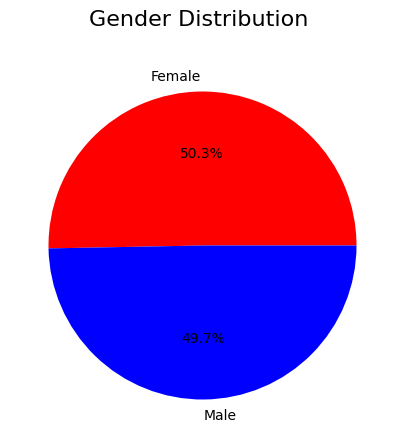

In [9]:
x= list(df['gender'].value_counts())
y= list(df['gender'].value_counts().keys())
plt.pie(x, labels= y , autopct= '%0.1f%%', colors=['red','blue'])
plt.title(label="Gender Distribution ", fontdict={"fontsize":16},pad=20)
plt.show()

### 2- What is the age group distribution of gym membership?

In [10]:
bins = [0, 18, 30, 40, float('inf')]  # Age ranges
labels = ['Under 18 yo ', '20-30 yo', '30-40 yo', 'Over 40 yo ']  # Category tags

df['age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)  

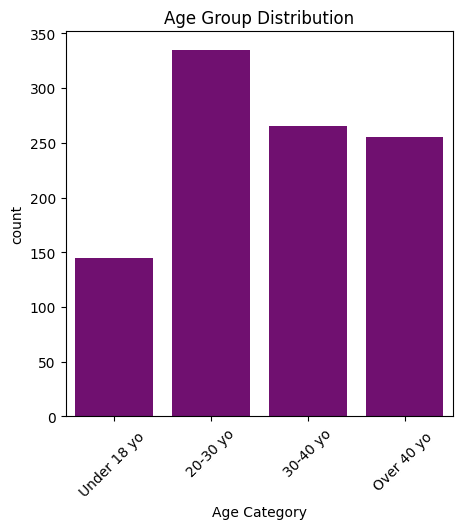

In [56]:
sns.countplot(data=df, x='age_category', color='purple')
plt.title('Age Group Distribution')
plt.xlabel('Age Category')
plt.xticks(rotation=45)
plt.show()

In [23]:
df['name_personal_trainer'].value_counts()

name_personal_trainer
Chantal    153
Mike       140
Hanna      114
Jeffrey    111
Name: count, dtype: int64

### 3- How much time do people spend on average in the gym?

In [69]:
avg_time_in_gym = df['avg_time_in_gym'].mean()

hours = int(avg_time_in_gym // 60)
minutes = int(avg_time_in_gym % 60) 

print(f"Average time in the gym: {hours} hours {minutes} minutes")

Average time in the gym: 1 hours 45 minutes


### 4- What are your top 5 favorite drinks at the gym?

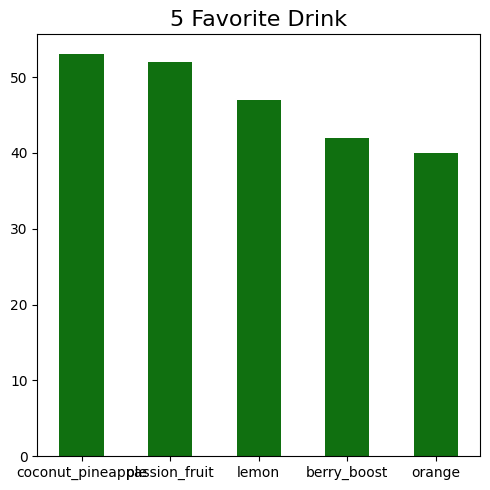

In [71]:
a= list(df['fav_drink'].value_counts()[0:5].keys())
b= list(df['fav_drink'].value_counts()[0:5])
sns.barplot(x=a, y=b, width=0.5, color='green')


plt.title('5 Favorite Drink', fontsize=16)
plt.tight_layout()

plt.show()

In [72]:
df.head()


,id,gender,birthday,Age,abonoment_type,visit_per_week,days_per_week,attend_group_lesson,fav_group_lesson,avg_time_check_in,avg_time_check_out,avg_time_in_gym,drink_abo,fav_drink,personal_training,name_personal_trainer,uses_sauna,age_category
0,1,Female,1997-04-18,27,Premium,4,"Mon, Sat, Tue, Wed",True,"Kickboxen, BodyPump, Zumba",19:31:00,21:27:00,116,False,NaN,False,NaN,True,20-30 yo
1,2,Female,1977-09-18,47,Standard,3,"Mon, Sat, Wed",False,NaN,19:31:00,20:19:00,48,False,NaN,True,Chantal,False,Over 40 yo
2,3,Male,1983-03-30,41,Premium,1,Sat,True,XCore,08:29:00,10:32:00,123,True,"berry_boost, lemon",True,Mike,False,Over 40 yo
3,4,Male,1980-04-12,44,Premium,3,"Sat, Tue, Wed",False,NaN,09:54:00,11:33:00,99,True,passion_fruit,True,Mike,True,Over 40 yo
4,5,Male,1980-09-10,44,Standard,2,"Thu, Wed",True,"Running, Yoga, Zumba",08:29:00,09:19:00,50,False,NaN,True,Mike,False,Over 40 yo


### 5- What percentage of people attend group classes? Which group classes are their favorite?

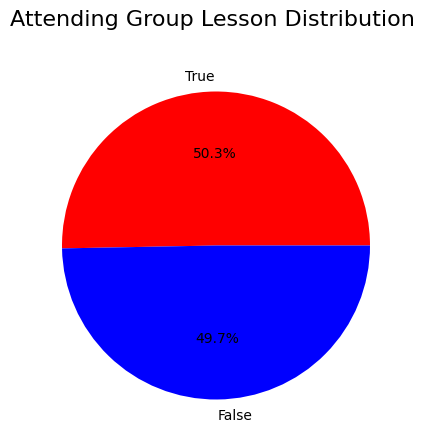

In [73]:
x= list(df['attend_group_lesson'].value_counts())
y= list(df['attend_group_lesson'].value_counts().keys())
plt.pie(x, labels= y , autopct= '%0.1f%%', colors=['red','blue'])
plt.title(label="Attending Group Lesson Distribution ", fontdict={"fontsize":16},pad=20)
plt.show()

In [83]:
df['fav_group_lesson'].value_counts().head()

fav_group_lesson
Yoga        20
BodyPump    20
LesMiles    19
XCore       18
Pilates     18
Name: count, dtype: int64

### 6- What is the distribution of personal trainers by customer's gender?

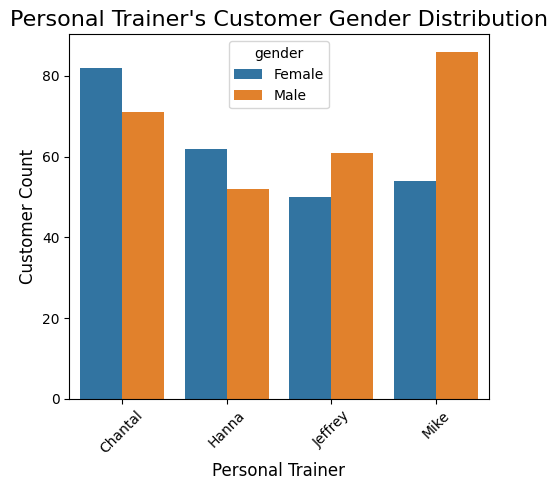

In [94]:
gender_count = df.groupby(['name_personal_trainer', 'gender']).size().reset_index(name='count')

sns.barplot(data=gender_count, x='name_personal_trainer', y='count', hue='gender')

plt.title('Personal Trainer\'s Customer Gender Distribution', fontsize=16)
plt.xlabel('Personal Trainer', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
